<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/fashionDeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from time import time

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [2]:
which = 3
out_file = 'numbers'
print( 'input data: ', out_file )
class_names = [ 't-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot' ] 
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
channels = 1  #gray=1; rgb=3

input data:  numbers
4423680/4422102 [==============================] - 0s 0us/step


**TODO #1 - Use a Randomized 80/20 Split for Training and Test Data**

In [3]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(70000, 28, 28)
(70000,)
# of training images and their size: (56000, 28, 28)
# of training labels and their size: (56000,) 

# of testing images and their size: (14000, 28, 28)
# of testing labels and their size: (14000,)


In [4]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 28
cols = 28
channels = 1 

min = 0
max = 255


In [5]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  56000
shape before:  (56000, 28, 28)
shape after:  (56000, 28, 28, 1)
# of testing images:  14000
shape before:  (14000, 28, 28)


In [6]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

**Create Convolutional Model**

In [7]:
model = keras.models.Sequential([
                                      keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=input_shape),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                                      keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                                      keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(128, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense(64, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense( len(class_names), activation='softmax' )
])
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

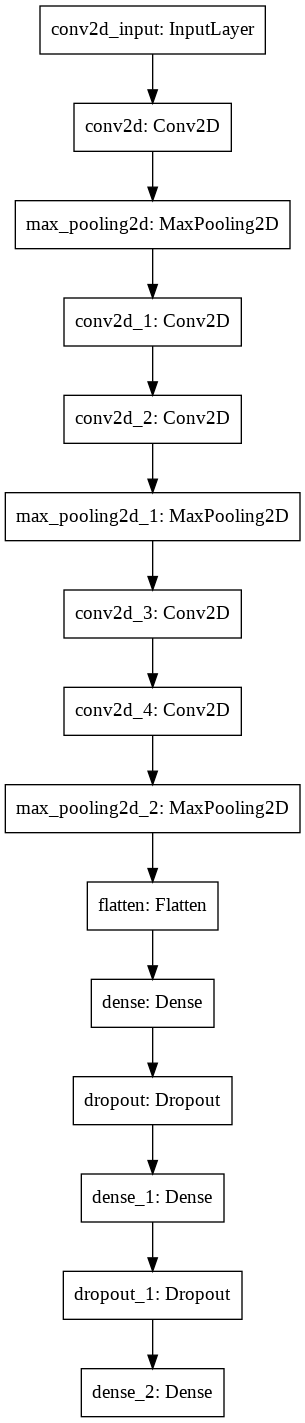

In [8]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [9]:
# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )

**TODO #2 - Train Model, Use Test Data for Validation**

---
Validation data does not affect the training of the model, it just provides metrics, so the test set can be used for validation.


In [10]:
print( "training ... \n" )
ep = 100
start = time()
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback],  validation_data=(x_test, y_test))
elapsed_training_time = time() - start

training ... 

Epoch 1/100
1750/1750 [==============================] - 41s 6ms/step - loss: 1.1689 - accuracy: 0.5676 - val_loss: 0.4157 - val_accuracy: 0.8489
Epoch 2/100
1750/1750 [==============================] - 9s 5ms/step - loss: 0.4740 - accuracy: 0.8356 - val_loss: 0.3311 - val_accuracy: 0.8790
Epoch 3/100
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3958 - accuracy: 0.8638 - val_loss: 0.3064 - val_accuracy: 0.8828
Epoch 4/100
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3436 - accuracy: 0.8845 - val_loss: 0.2786 - val_accuracy: 0.8979
Epoch 5/100
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3243 - accuracy: 0.8893 - val_loss: 0.2828 - val_accuracy: 0.8975
Epoch 6/100
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3000 - accuracy: 0.8945 - val_loss: 0.2683 - val_accuracy: 0.9028
Epoch 7/100
1750/1750 [==============================] - 9s 5ms/step - loss: 0.2831 - accuracy: 0.9020 - val_loss:

In [12]:
model.save('fashion_conv.h5')

In [13]:
print(elapsed_training_time)

958.1291046142578


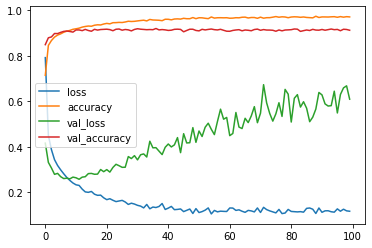

In [14]:
pd.DataFrame(model.history.history).plot()

**Create Noisy Test Data**

In [15]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1

noisy_test_sets = list()
noisy_display_sets = list()

#Base noiseless data
noisy_test_sets.append(x_test)
noisy_x_test = x_test

for i in range(0, 20):

  noise = np.random.normal(0, .1, x_test.shape)
  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)

  noisy_test_sets.append(noisy_x_test)
  # Reshape and multiply by 255 to get images for display
  noisy_display_sets.append(noisy_x_test.reshape(len(x_test), img_rows, img_cols) * 255)

In [16]:
noise_accuracy_scores = list()
noisy_predictions = list()
noise_classification_data = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noise_classification_data.append(classification_report(y_test, pred))
  noisy_predictions.append(pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
acc_df = pd.DataFrame(noise_accuracy_scores)
acc_df.to_csv('conv_accuracy.csv')

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

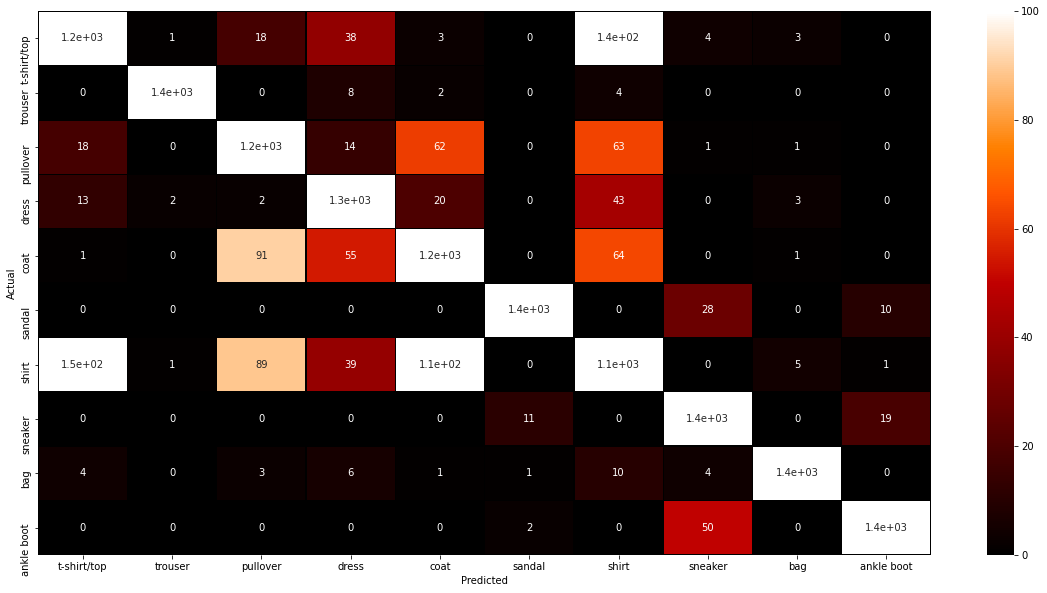

In [18]:
noiseless_prediction = noisy_predictions[0]
cm = confusion_matrix(y_test, noiseless_prediction)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [19]:
bad = [noiseless_prediction[i] for i in range(len(noiseless_prediction)) if noiseless_prediction[i] != y_test[i]]
good = [noiseless_prediction[i] for i in range(len(noiseless_prediction)) if noiseless_prediction[i] == y_test[i]]

[189   4 203 160 202  14 328  87  13  30]


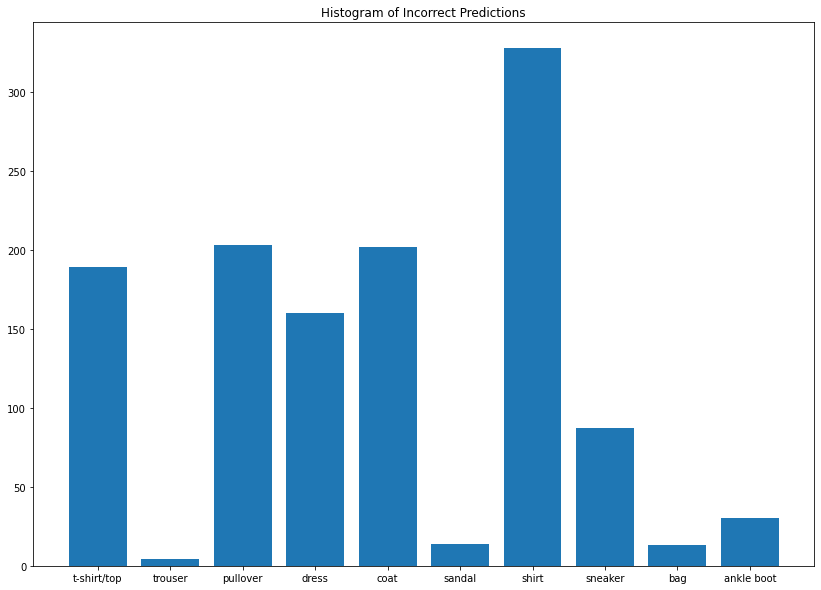

In [20]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1160 1359 1189 1287 1230 1364 1057 1367 1383 1374]


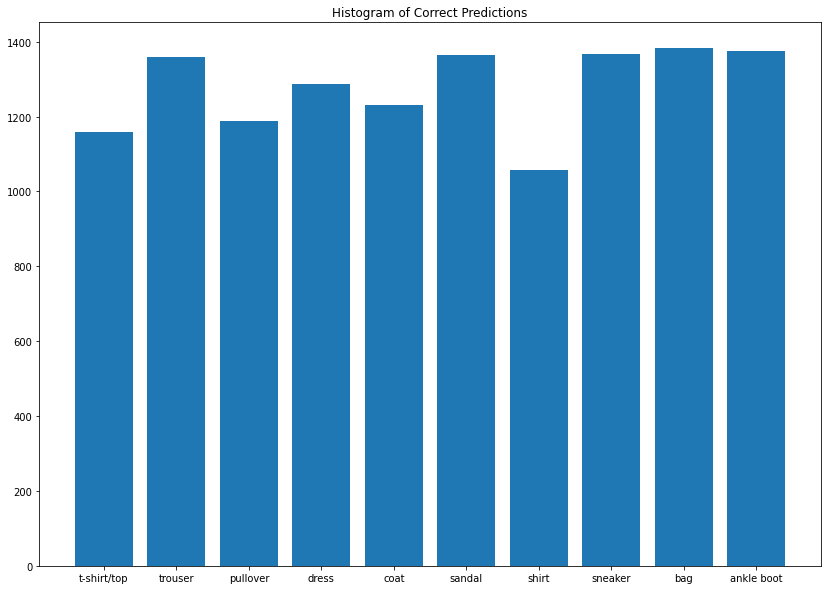

In [21]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

This model seems to have some trouble with shirts.

[14.010378057820608, 0.293470286133529, 14.583333333333334, 11.0573600552868, 14.106145251396647, 1.0159651669085632, 23.68231046931408, 5.983493810178817, 0.9312320916905444, 2.1367521367521367]


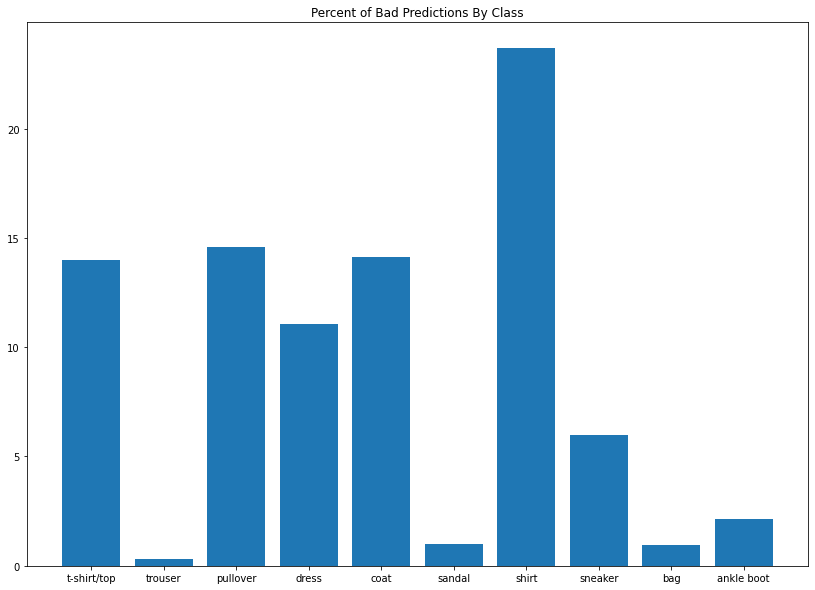

In [22]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

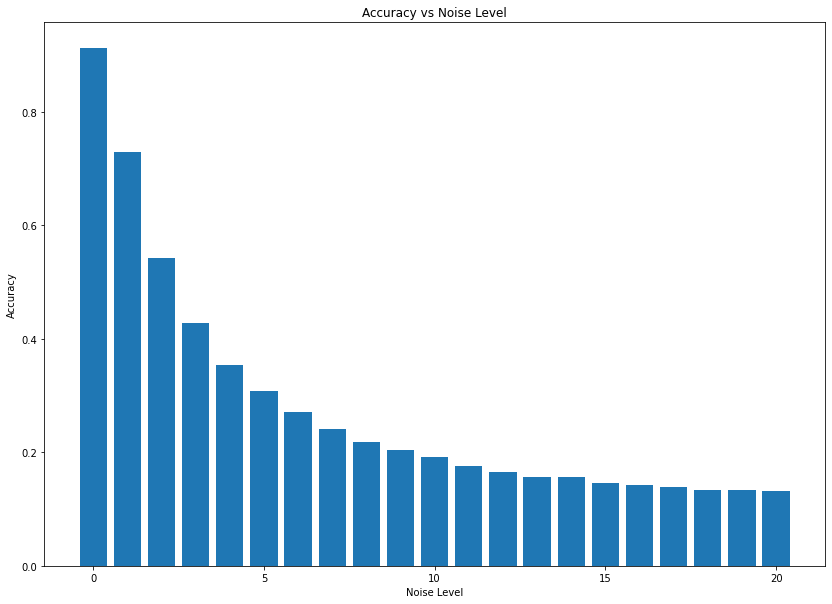

In [23]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()